In [98]:
from numpy import *
from scipy.stats import beta
import random
import pandas as pd
import numpy as np

np.random.seed(42)

In [99]:
data = pd.read_csv('Bandits income data.csv')

In [100]:
class BetaBandit(object):
    def __init__(self, num_options=3, prior=(1.0,1.0)):
        self.trials = zeros(shape=(num_options,), dtype=int)
        self.successes = zeros(shape=(num_options,), dtype=int)
        self.num_options = num_options
        self.prior = prior

    def add_result(self, trial_id, success):
        self.trials[trial_id] = self.trials[trial_id] + 1
        self.successes[trial_id] = self.successes[trial_id] + success

    def get_recommendation(self):
        sampled_theta = []
        for i in range(self.num_options):
            #Construct beta distribution for posterior
            dist = beta(self.prior[0]+self.successes[i],
                        self.prior[1]+self.trials[i]-self.successes[i])
            #Draw sample from beta distribution
            sampled_theta += [ dist.rvs() ]
        # Return the index of the sample with the largest value
        return sampled_theta.index( max(sampled_theta) )


In [101]:
bb = BetaBandit(3)
datas_sample = data.sample(n=len(data))

In [102]:
for row in  datas_sample[:10]:
    bandit.add_result([0,1,2], row)

    

In [103]:
datas_sample.values[0]

array([1, 1, 0], dtype=int64)

C:\Users\myz\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


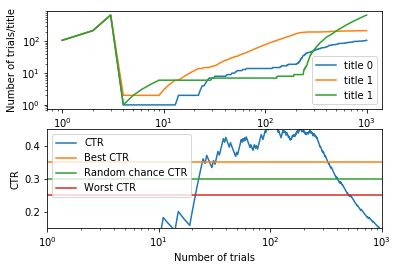

In [104]:
N = 1000
trials = zeros(shape=(N,3))
successes = zeros(shape=(N,3))

bb = BetaBandit()
for i in range(N):
    s = datas_sample[10:].sample().values
    choice = bb.get_recommendation()
    trials[choice] = trials[choice]+1
    conv = s[0][choice]
    bb.add_result(choice, conv)

    trials[i] = bb.trials
    successes[i] = bb.successes

from pylab import *
subplot(211)
n = arange(N)+1
loglog(n, trials[:,0], label="title 0")
loglog(n, trials[:,1], label="title 1")
loglog(n, trials[:,2], label="title 1")

legend()
xlabel("Number of trials")
ylabel("Number of trials/title")

subplot(212)
semilogx(n, (successes[:,0]+successes[:,1])/n, label="CTR")
semilogx(n, zeros(shape=(N,))+0.35, label="Best CTR")
semilogx(n, zeros(shape=(N,))+0.30, label="Random chance CTR")
semilogx(n, zeros(shape=(N,))+0.25, label="Worst CTR")
axis([0,N,0.15,0.45])
xlabel("Number of trials")
ylabel("CTR")


legend()
show()
